# Average method, Naive method, Seasonal naive method, Drift method

위 메소드들을 적용해보기 위해 train 데이터셋과 test 데이터셋을 나눠 실습을 진행할겁니다.
goog 데이터는 일별데이터(주말제외)로 h=40으로 설정하게되면 총 200일의 데이터를 학습용으로 사용한 셈이 됩니다.

여기에서는 average method와 naive method, drift method를 확인해볼 겁니다.
naive method는 naive()메소드로도 사용가능하지만, rwf()에서 drift 값을 FALSE로 두니 정말로 naive method가 나오는 것을 확인하실 수 있습니다.

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.296286e-15,36.91961,26.86941,-0.6596884,5.95376,7.182995,0.9668981,NA
Test set,1.132697e+02,114.21375,113.26971,20.3222979,20.32230,30.280376,0.8104340,13.92142


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.6967249,6.208148,3.740697,0.1426616,0.8437137,1.000000,-0.06038617,NA
Test set,24.3677328,28.434837,24.593517,4.3171356,4.3599811,6.574582,0.81043397,3.451903


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.998536e-15,6.168928,3.824406,-0.01570676,0.8630093,1.022378,-0.06038617,NA
Test set,1.008487e+01,14.077291,11.667241,1.77566103,2.0700918,3.119002,0.64732736,1.709275


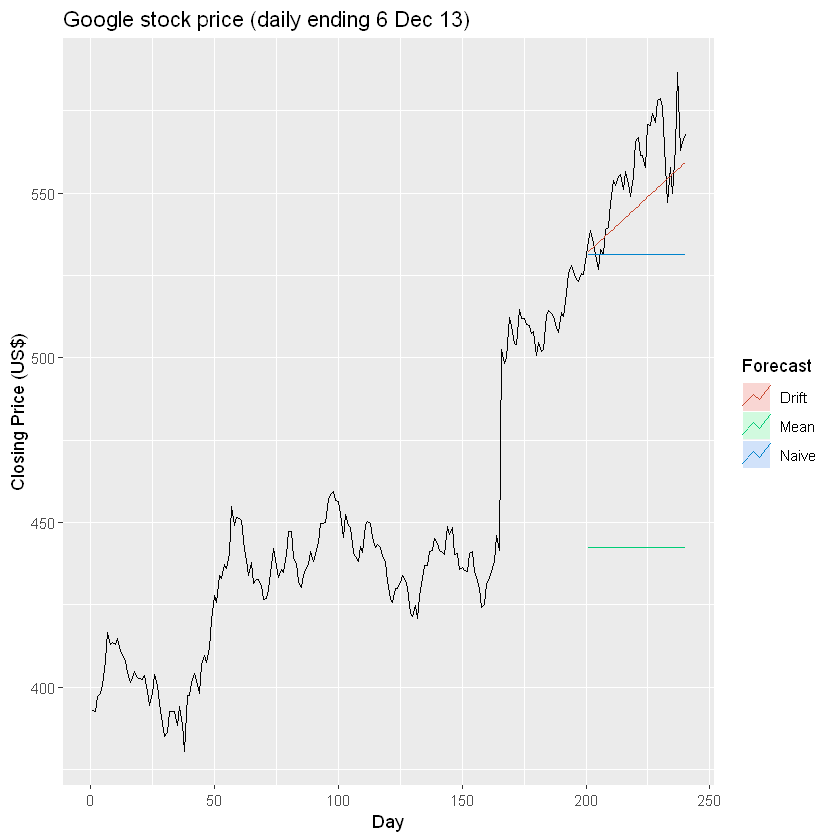

In [1]:
library(forecast)
library(fpp2)

googfc1 <- meanf(goog200, h=40)
googfc2 <- rwf(goog200, h=40)
googfc3 <- rwf(goog200, drift=TRUE, h=40)
autoplot(subset(goog, end = 240)) + autolayer(googfc1, PI=FALSE, series="Mean") + autolayer(googfc2, PI=FALSE, series="Naive") + autolayer(googfc3, PI=FALSE, series="Drift") + xlab("Day") + ylab("Closing Price (US$)") + ggtitle("Google stock price (daily ending 6 Dec 13)") + guides(colour=guide_legend(title="Forecast"))
googtest <- window(goog, start=201, end=240)
accuracy(googfc1, googtest)
accuracy(googfc2, googtest)
accuracy(googfc3, googtest)